In [1]:
import sys
sys.path.append('../')

# Parser

In [2]:
import json
from asr.utils.parse_config import ConfigParser

In [3]:
config_file = open('../configs/new.json')
config_file = json.load(config_file)
config_parser = ConfigParser(config_file)

In [4]:
config_parser.config

{'name': 'train_quartznet_librispeech_config',
 'overfit': False,
 'n_gpu': 2,
 'preprocessing': {'sr': 22050,
  'spectrogram': {'type': 'MelSpectrogram',
   'args': {'sample_rate': 22050,
    'n_fft': 1024,
    'win_length': 1024,
    'hop_length': 256,
    'n_mels': 64}}},
 'augmentations': {'wave': [{'type': 'GaussianNoiseAugmentation',
    'args': {'std': 0.005}},
   {'type': 'TimeStretchingAugmentation', 'args': {'stretch': 'random'}},
   {'type': 'PitchShiftingAugmentation',
    'args': {'sample_rate': 22050, 'n_steps': 'random'}},
   {'type': 'VolumeAugmentation', 'args': {'gain': 'random'}}],
  'spectrogram': [{'type': 'SpectAugmentation',
    'args': {'filling_value': 'mean',
     'n_freq_masks': 2,
     'n_time_masks': 2,
     'max_freq': 20,
     'max_time': 30}}]},
 'arch': {'type': 'QuartzNet',
  'args': {'n_feats': 64,
   'hidden_channels': 256,
   'B': 5,
   'S': 2,
   'R': 5,
   'kernel_sizes_for_blocks': [33, 39, 51, 63, 75]}},
 'data': {'train': {'batch_size': 8,
   '

In [5]:
config_parser.log_dir

PosixPath('saved/log/train_quartznet_librispeech_config/1024_150600')

In [6]:
config_parser.save_dir

PosixPath('saved/models/train_quartznet_librispeech_config/1024_150600')

# librispeech_dataset.py

In [7]:
from asr.datasets.utils import get_dataloaders
from asr.text_encoder.text_encoder import TextEncoder
from asr.text_encoder.text_encoder import get_simple_alphabet
from asr.augmentations import from_configs

In [8]:
text_encoder = TextEncoder(get_simple_alphabet())

In [9]:
dataloaders = get_dataloaders(configs=config_parser, text_encoder=text_encoder)

61 (2.3%) records are longer then 20.0 seconds. Excluding them.
292 (10.8%) records are longer then200 characters. Excluding them.
Filtered 292(10.8%) records  from dataset


/opt/anaconda3/lib/python3.8/site-packages/torch/utils/data/dataloader.py:478: UserWarning: This DataLoader will create 20 worker processes in total. Our suggested max number of worker in current system is 4 (`cpuset` is not taken into account), which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [10]:
dataloader_train = dataloaders['train']

In [11]:
for batch in dataloader_train:
    break

In [12]:
batch["spectrogram"]

tensor([[[12.1643, 12.1643, 12.1643,  ..., 12.1643, 12.1643, 12.1643],
         [12.1643, 12.1643, 12.1643,  ..., 12.1643, 12.1643, 12.1643],
         [12.1643, 12.1643, 12.1643,  ..., 12.1643, 12.1643, 12.1643],
         ...,
         [12.1643, 12.1643, 12.1643,  ..., 12.1643, 12.1643, 12.1643],
         [12.1643, 12.1643, 12.1643,  ..., 12.1643, 12.1643, 12.1643],
         [12.1643, 12.1643, 12.1643,  ..., 12.1643, 12.1643, 12.1643]],

        [[ 9.6075,  9.6075,  9.6075,  ...,  9.6075,  9.6075,  9.6075],
         [ 9.6075,  9.6075,  9.6075,  ...,  9.6075,  9.6075,  9.6075],
         [ 9.6075,  9.6075,  9.6075,  ...,  9.6075,  9.6075,  9.6075],
         ...,
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],

        [[10.2389, 10.2389, 10.2389,  ..., 10.2389, 10.2389, 10.2389],
         [10.2389, 10.2389, 10.2389,  ..., 10

In [14]:
from asr.logger.utils import plot_spectrogram
import matplotlib.pyplot as plt

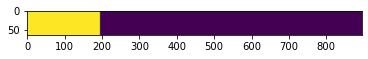

In [15]:
plt.imshow(batch['spectrogram'][3].permute(1, 0))

In [15]:
batch

{'audio': [tensor([[0.0024, 0.0020, 0.0011,  ..., 0.0039, 0.0036, 0.0023]]),
  tensor([[0.0030, 0.0034, 0.0030,  ..., 0.0023, 0.0022, 0.0004]]),
  tensor([[ 3.3703e-03,  6.1467e-03,  4.5121e-03,  ...,  1.6496e-05,
           -1.0747e-03, -1.8082e-03]]),
  tensor([[0.0057, 0.0062, 0.0054,  ..., 0.0028, 0.0021, 0.0009]]),
  tensor([[0.0016, 0.0024, 0.0028,  ..., 0.0038, 0.0046, 0.0031]]),
  tensor([[-0.0010, -0.0008, -0.0003,  ..., -0.0011, -0.0012, -0.0006]]),
  tensor([[-0.0358, -0.0389, -0.0341,  ..., -0.0368, -0.0365, -0.0120]]),
  tensor([[0.0007, 0.0008, 0.0006,  ..., 0.0000, 0.0000, 0.0000]]),
  tensor([[-6.5386e-05, -1.3814e-03, -2.3069e-03,  ..., -8.9228e-04,
            3.4048e-04,  3.0951e-04]]),
  tensor([[-1.0015e-03, -1.1310e-03, -1.1547e-03,  ..., -5.4502e-05,
           -2.1051e-04, -4.5887e-05]]),
  tensor([[ 0.0005,  0.0006, -0.0002,  ...,  0.0010,  0.0017,  0.0014]]),
  tensor([[ 0.0004,  0.0027,  0.0037,  ..., -0.0020, -0.0020, -0.0005]]),
  tensor([[2.9216e-28, 2.921

In [16]:
batch["audio"]


[tensor([[9.1553e-05, 1.3428e-03, 3.0518e-04,  ..., 5.1270e-03, 8.7280e-03,
          9.7656e-04]]),
 tensor([[-0.0005, -0.0002, -0.0002,  ...,  0.0023,  0.0020,  0.0016]]),
 tensor([[0.0016, 0.0026, 0.0026,  ..., 0.0033, 0.0040, 0.0041]]),
 tensor([[-9.1553e-05, -1.8311e-04, -1.2207e-04,  ..., -2.4414e-04,
          -9.1553e-05,  3.0518e-05]]),
 tensor([[-0.0067,  0.0083,  0.0089,  ..., -0.0004, -0.0003, -0.0002]]),
 tensor([[ 1.5259e-04,  3.9673e-04,  6.1035e-05,  ..., -2.7466e-04,
          -3.6316e-03, -5.1270e-03]]),
 tensor([[ 0.0027, -0.0027, -0.0039,  ..., -0.0117,  0.0049,  0.0090]]),
 tensor([[0.0031, 0.0032, 0.0033,  ..., 0.0007, 0.0017, 0.0024]]),
 tensor([[ 3.3569e-03,  6.1035e-03,  1.9226e-03,  ..., -8.6670e-03,
           6.1035e-05, -1.9836e-03]]),
 tensor([[-0.0009, -0.0116, -0.0166,  ..., -0.0016, -0.0014, -0.0017]]),
 tensor([[ 2.4414e-04,  1.8311e-04,  9.1553e-05,  ..., -7.6294e-04,
          -7.3242e-04, -6.7139e-04]]),
 tensor([[ 0.0103,  0.0090,  0.0036,  ..., -0

In [16]:

from IPython import display
import torch
import matplotlib.pyplot as plt

In [17]:
def visualize_audio(wav: torch.Tensor, sr: int = 22050):
    # Average all channels
    if wav.dim() == 2:
        # Any to mono audio convertion
        wav = wav.mean(dim=0)
    
    plt.figure(figsize=(16, 5))
    plt.plot(wav, alpha=.7, c='green')
    plt.grid()
    plt.xlabel('Time', size=16)
    plt.ylabel('Amplitude', size=16)
    plt.show()
    
    display.display(display.Audio(wav, rate=sr)) # normalize=False

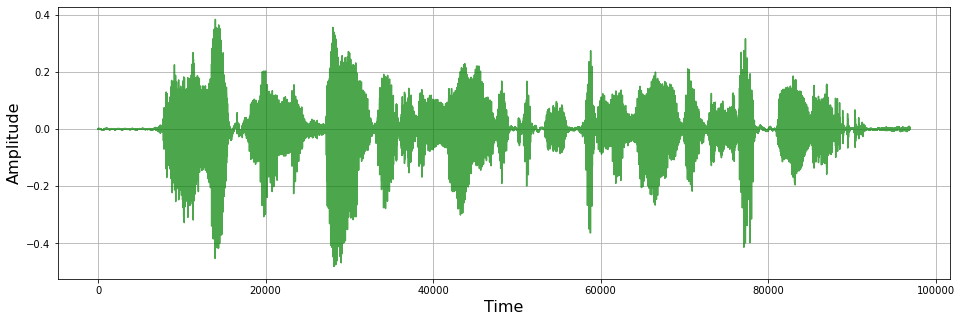

In [18]:
visualize_audio(batch["audio"][1])

In [19]:
display.display(display.Audio(batch["audio"][4], rate=1600))

In [20]:
display.display(display.Audio(batch["audio"][4].squeeze(), rate=20000))

In [21]:
from operator import xor

from torch.utils.data import DataLoader, ConcatDataset

import asr.augmentations
import asr.batch_sampler as batch_sampler_module
import asr.datasets
from asr.text_encoder.text_encoder import TextEncoder
from asr.collate_fn.collate import collate_fn
from asr.utils.parse_config import ConfigParser

In [22]:
for split, params in config_parser["data"].items():
    break

In [23]:
params

{'batch_size': 8,
 'num_workers': 20,
 'datasets': [{'type': 'LibrispeechDataset',
   'args': {'part': 'dev-clean',
    'max_audio_length': 20.0,
    'max_text_length': 200}}]}

In [24]:
wave_augs, spec_augs = asr.augmentations.from_configs(config_parser)
drop_last = True

In [25]:
spec_augs

In [26]:
wave_augs

In [27]:
datasets = []
for ds in params["datasets"]:
    datasets.append(config_parser.init_obj(ds, asr.datasets, 
                                        text_encoder=text_encoder, config_parser=config_parser,
                                        wave_augs=None, spec_augs=None))

61 (2.3%) records are longer then 20.0 seconds. Excluding them.
292 (10.8%) records are longer then200 characters. Excluding them.
Filtered 292(10.8%) records  from dataset


In [28]:
datasets

In [29]:
assert len(datasets)

if len(datasets) > 1:
    dataset = ConcatDataset(datasets)
else:
    dataset = datasets[0]

In [30]:
dataset.index

[{'path': '/Users/khaykingleb/Desktop/QuartzNet/data/datasets/librispeech/dev-clean/3081/166546/3081-166546-0073.flac',
  'text': 'yes',
  'audio_len': 1.445},
 {'path': '/Users/khaykingleb/Desktop/QuartzNet/data/datasets/librispeech/dev-clean/777/126732/777-126732-0081.flac',
  'text': 'comfortable dear',
  'audio_len': 1.505},
 {'path': '/Users/khaykingleb/Desktop/QuartzNet/data/datasets/librispeech/dev-clean/251/136532/251-136532-0022.flac',
  'text': 'lectures',
  'audio_len': 1.535},
 {'path': '/Users/khaykingleb/Desktop/QuartzNet/data/datasets/librispeech/dev-clean/2035/147960/2035-147960-0015.flac',
  'text': 'otto winked at me',
  'audio_len': 1.56},
 {'path': '/Users/khaykingleb/Desktop/QuartzNet/data/datasets/librispeech/dev-clean/1272/141231/1272-141231-0013.flac',
  'text': 'the twenties',
  'audio_len': 1.6399375},
 {'path': '/Users/khaykingleb/Desktop/QuartzNet/data/datasets/librispeech/dev-clean/5694/64025/5694-64025-0000.flac',
  'text': 'shiloh',
  'audio_len': 1.67},


In [31]:
if "batch_size" in params:
    bs = params["batch_size"]
    shuffle = True
    batch_sampler = None

In [32]:
dataset.index[0]

{'path': '/Users/khaykingleb/Desktop/QuartzNet/data/datasets/librispeech/dev-clean/3081/166546/3081-166546-0073.flac',
 'text': 'yes',
 'audio_len': 1.445}

In [33]:
dataset[2]

{'audio': tensor([[-0.0007, -0.0007, -0.0006,  ...,  0.0033,  0.0036,  0.0017]]),
 'spectrogram': tensor([[[3.5387e-04, 4.9094e-04, 1.1439e-03,  ..., 1.4009e-03,
           2.3258e-03, 1.6724e-03],
          [1.4170e-02, 1.5474e-02, 2.0661e-02,  ..., 3.1842e-02,
           2.4869e-02, 1.2696e-02],
          [1.4098e-02, 7.5175e-03, 1.0115e-02,  ..., 2.7654e-02,
           1.1633e-02, 2.4577e-03],
          ...,
          [5.7258e-07, 1.5696e-07, 1.9646e-08,  ..., 4.2059e-07,
           8.8932e-06, 7.2563e-05],
          [7.1009e-07, 1.7871e-07, 9.4080e-10,  ..., 5.5701e-08,
           8.0611e-06, 6.6540e-05],
          [7.8399e-07, 1.9674e-07, 9.5752e-10,  ..., 5.9314e-08,
           7.6539e-06, 6.3501e-05]]]),
 'duration': 1.535,
 'text': 'lectures',
 'text_encoded': tensor([[12.,  5.,  3., 20., 21., 18.,  5., 19.]]),
 'audio_path': '/Users/khaykingleb/Desktop/QuartzNet/data/datasets/librispeech/dev-clean/251/136532/251-136532-0022.flac'}

In [34]:
data_dict = dataset.index[0]
audio_path = data_dict["path"]

#audio_wave, audio_spec = self.process_wave(audio_wave)


In [35]:
audio_path

'/Users/khaykingleb/Desktop/QuartzNet/data/datasets/librispeech/dev-clean/3081/166546/3081-166546-0073.flac'

In [36]:
import torchaudio
import torch

In [37]:
def load_audio(path):
        audio_tensor, sr = torchaudio.load(path)
        audio_tensor = audio_tensor[0:1, :]  # remove all channels but the first
        target_sr = 16000
        if sr != target_sr:
            audio_tensor = torchaudio.functional.resample(audio_tensor, sr, target_sr)
        return audio_tensor

In [38]:
audio_wave = load_audio(audio_path)

In [39]:
audio_wave

tensor([[-0.0024, -0.0027, -0.0031,  ...,  0.0014,  0.0012,  0.0001]])

In [56]:
def process_wave(audio_tensor_wave):
    with torch.no_grad():

        if wave_augs is not None:
            audio_tensor_wave = wave_augs(audio_tensor_wave)
            print("hi")

        wave2spec = config_parser.init_obj(config_parser["preprocessing"]["spectrogram"],
                                           torchaudio.transforms)
        
        audio_tensor_spec = wave2spec(audio_tensor_wave)

        if spec_augs is not None:
            print("hi")
            audio_tensor_spec = spec_augs(audio_tensor_spec)

        return audio_tensor_wave, audio_tensor_spec

In [57]:
config_parser["preprocessing"]["spectrogram"]

{'type': 'MelSpectrogram',
 'args': {'sample_rate': 22050,
  'n_fft': 1024,
  'win_length': 1024,
  'hop_length': 256,
  'n_mels': 64}}

In [58]:
audio_wave, audio_spec = process_wave(audio_wave)

hi
hi


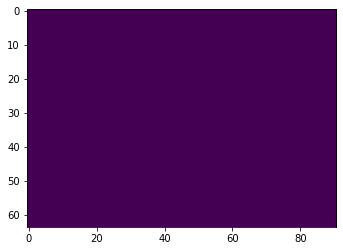

In [60]:
plt.imshow(audio_spec.squeeze().log())

In [87]:
a = torchaudio.transforms.MelSpectrogram(n_mels=32, sample_rate=22050)

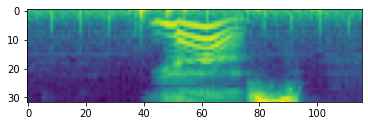

In [88]:
plt.imshow(a(audio_wave).squeeze().log())

In [4]:
from asr.utils import ROOT_PATH

In [ ]:
try:
    data_dir = ROOT_PATH / "data" / "datasets" / "ljspeech"
    data_dir.mkdir(exist_ok=True, parents=True)

except Exception:
    print('Directory is already created.')

In [6]:
part = "train"
index_path = data_dir / f"{part}_index.json"

In [9]:
index = []

In [10]:
URL = "https://data.keithito.com/data/speech/LJSpeech-1.1.tar.bz2"

In [12]:
import json
import logging
import os
import shutil
from speechbrain.utils.data_utils import download_file

In [13]:
arch_path = data_dir / "LJSpeech-1.1.tar.bz2"

print(f"Loading LJSpeech-1.1")
download_file(URL, arch_path)

Loading LJSpeech-1.1


LJSpeech-1.1.tar.bz2: 2.75GB [30:04, 1.52MB/s]                            


In [14]:
shutil.unpack_archive(arch_path, data_dir)

OSError: [Errno 28] No space left on device

In [ ]:
for fpath in (data_dir / "LJSpeech-1.1").iterdir():
            shutil.move(str(fpath), str(data_dir / fpath.name))

In [ ]:
os.remove(str(arch_path))

In [ ]:
shutil.rmtree(str(data_dir / "LJSpeech-1.1")